In [ ]:
!pip install fdasrsf==2.2.1

     |████████████████████████████████| 4.3 MB 11.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 54.5 MB/s 
     |████████████████████████████████| 231 kB 56.0 MB/s 
     |████████████████████████████████| 68 kB 56.7 MB/s 
     |████████████████████████████████| 402 kB 67.1 MB/s 
     |████████████████████████████████| 3.2 MB 67.1 MB/s 
     |████████████████████████████████| 112 kB 6.7 MB/s 
     |████████████████████████████████| 25.3 MB 64.0 MB/s 
  Created wheel for fdasrsf: filename=fdasrsf-2.2.1-cp37-cp37m-linux_x86_64.whl size=429477 sha256=af9319f8f42cc2cef4dc743e6684fcd79ff02d737631f41a6222ca6c71fd026b
  Stored in directory: /tmp/pip-ephem-wheel-cache-qonktt68/wheels/b5/58/8e/be88d37243f7d9f17d05a1b0d21a55395e0e49ec7ab38fdbe4
Successfully built fdasrsf
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' comm

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import fdasrsf

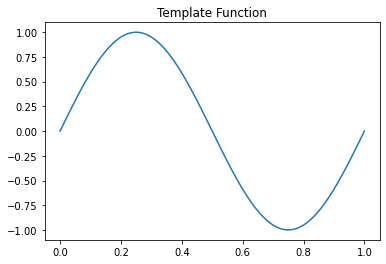

In [ ]:
# make an example function
t = np.linspace(0, 1, 100)
f = np.sin(2 * np.pi * t)

# plot it
plt.plot(t, f)
plt.title('Template Function')
plt.show()

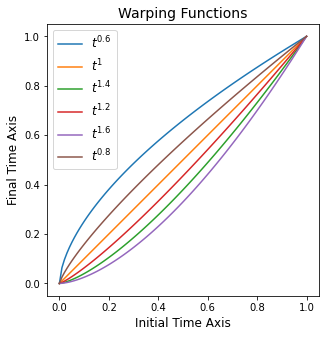

In [ ]:
# create a family of warping functions
exps = [0.6, 1, 1.4, 1.2, 1.6, 0.8]
amps = [1, 1.2, 0.8, 0.9, 1.1, 0.7]
gammas = [t**exp for exp in exps]
N = len(exps)

# plot the warping functions
plt.figure(figsize=(5, 5))
for i in range(N):
    plt.plot(t, gammas[i], label= (r'$t^{' + str(exps[i]) + '}$'))

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Initial Time Axis', fontsize=12)
plt.ylabel('Final Time Axis', fontsize=12)
plt.title('Warping Functions', fontsize=14)
plt.legend(fontsize=12)
plt.show()

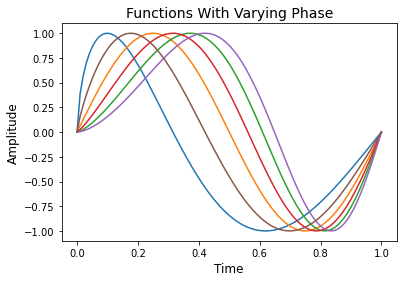

In [ ]:
# apply function warping to generate some example data
fw = [fdasrsf.utility_functions.warp_f_gamma(t, f, gamma) for gamma in gammas]

# plot!
for i in range(N):
    plt.plot(t, fw[i])

plt.title('Functions With Varying Phase', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.show()

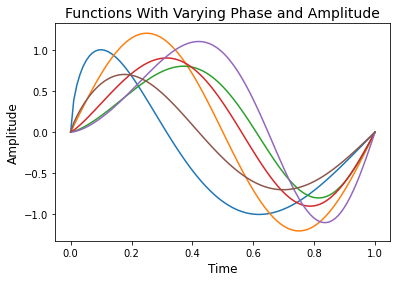

In [ ]:
# now scale by amplitudes to create some variation, and plot!
fs = [amps[i] * fw[i] for i in range(N)]

# plot!
for i in range(N):
    plt.plot(t, fs[i])

plt.title('Functions With Varying Phase and Amplitude', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.show()


[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

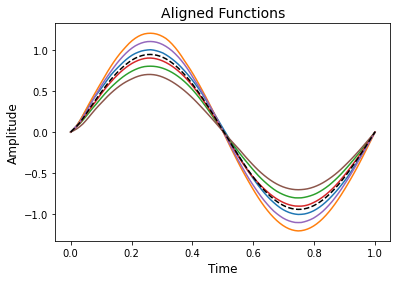

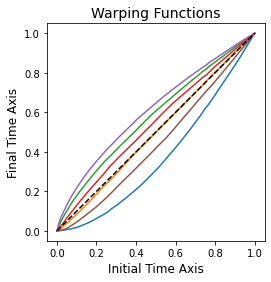

In [ ]:
fs = np.array(fs)
print (t)
output = fdasrsf.time_warping.fdawarp(fs.T, t)
output.srsf_align()

plt.figure()
plt.plot(t, output.fn)
plt.plot(t, output.fmean - output.fmean[0], 'k--')
plt.title('Aligned Functions', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)

plt.figure()
plt.plot(t, output.gam)
plt.plot(t, t, 'k--')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Initial Time Axis', fontsize=12)
plt.ylabel('Final Time Axis', fontsize=12)
plt.title('Warping Functions', fontsize=14)
plt.show()

In [ ]:
## CURVE ALIGNMENT EXAMPLE

# (n = dimension, T = points per curve, K = number of curves)
n = 2
T = 40
K = 3

# time
t = np.linspace(0, 1, T)

# make K example curves
alist = [1, 2, 3]
blist = [6, 4, 5]
exps = [0.7, 0.9, 1.2]

xs = []
ys = []
for i in range(K):
    gamma = t**exps[i]
    x = alist[i] * np.cos(np.pi * t)
    y = blist[i] * np.sin(np.pi * t)
    xs.append(fdasrsf.utility_functions.warp_f_gamma(t, x, gamma))
    ys.append(fdasrsf.utility_functions.warp_f_gamma(t, y, gamma))

print(len(xs))
print(xs)

3
[array([ 1.        ,  0.97091115,  0.92352799,  0.86629099,  0.80307235,
        0.73402127,  0.66136539,  0.58616012,  0.50904238,  0.43061906,
        0.35136011,  0.27193833,  0.19285857,  0.11451162,  0.0372492 ,
       -0.03861003, -0.11273013, -0.18483481, -0.25469568, -0.32212033,
       -0.38694989, -0.44905641, -0.50834006, -0.56453521, -0.6171907 ,
       -0.66667412, -0.71297595, -0.75610353, -0.79569647, -0.83126127,
       -0.86357924, -0.89271569, -0.91848158, -0.9398545 , -0.95814054,
       -0.97343681, -0.98503548, -0.99276756, -0.99772129, -1.        ]), array([ 2.        ,  1.98492448,  1.95181474,  1.90257669,  1.83837299,
        1.75962496,  1.66887276,  1.56712508,  1.45538358,  1.33464948,
        1.2059261 ,  1.07021888,  0.92853379,  0.78187478,  0.63124061,
        0.47762131,  0.32199442,  0.1653212 ,  0.00854286, -0.14742313,
       -0.30168659, -0.45338797, -0.60170148, -0.74583805, -0.88504789,
       -1.01862296, -1.14589904, -1.26625759, -1.37861824, 

In [ ]:
# collect the curves into an array
beta = np.zeros((n, T, K))
for i in range(K):
    beta[0, :, i] = xs[i]
    beta[1, :, i] = ys[i]

In [ ]:
beta.shape

2

In [ ]:
beta[0, :, 1]

array([ 2.        ,  1.98492448,  1.95181474,  1.90257669,  1.83837299,
        1.75962496,  1.66887276,  1.56712508,  1.45538358,  1.33464948,
        1.2059261 ,  1.07021888,  0.92853379,  0.78187478,  0.63124061,
        0.47762131,  0.32199442,  0.1653212 ,  0.00854286, -0.14742313,
       -0.30168659, -0.45338797, -0.60170148, -0.74583805, -0.88504789,
       -1.01862296, -1.14589904, -1.26625759, -1.37861824, -1.48274293,
       -1.57825897, -1.6647537 , -1.74186786, -1.8092958 , -1.86678525,
       -1.91413701, -1.95120431, -1.97789201, -1.9941556 , -2.        ])

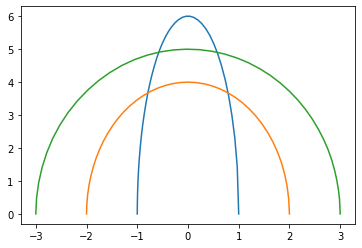

In [ ]:
# visualize the curves
for i in [0, 1, 2]:
    plt.plot(beta[0, :, i], beta[1, :, i])

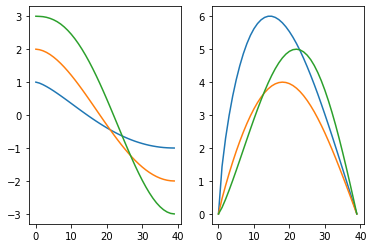

In [ ]:
plt.subplot(1, 2, 1)
for i in [0, 1, 2]:
    plt.plot(beta[0, :, i])

plt.subplot(1, 2, 2)
for i in [0, 1, 2]:
    plt.plot(beta[1, :, i])

In [ ]:
# create a curve registration object
curve = fdasrsf.curve_stats.fdacurve(beta, 'O')

In [ ]:
# align curves (this make take some time!)
curve.srvf_align()

Computing Karcher Mean of 3 curves in SRVF space..
updating step: 1
updating step: 2
updating step: 3
updating step: 4
updating step: 5


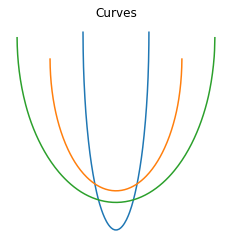

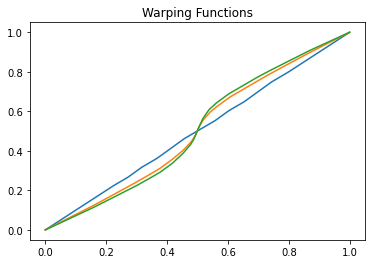

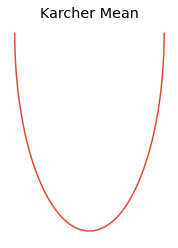

In [ ]:
# plot result
curve.plot()

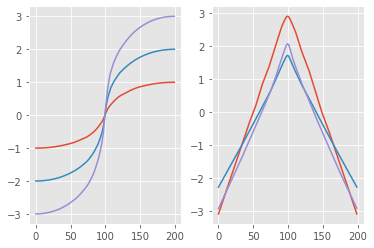

In [ ]:
plt.subplot(1, 2, 1)
for i in [0, 1, 2]:
    plt.plot(curve.betan[0, :, i])

plt.subplot(1, 2, 2)
for i in [0, 1, 2]:
    plt.plot(curve.betan[1, :, i])

In [ ]:
## RECREATE INTERPOLATION ERROR

n = 2
K = 3

# time
t = np.linspace(0, 1, 40)

# make K example curves
alist = [1, 2, 3]
blist = [6, 4, 5]
exps = [0.7, 0.9, 1.2]

xs = []
ys = []
for i in range(K):
    gamma = t**exps[i]
    x = alist[i] * np.cos(np.pi * t)
    y = blist[i] * np.sin(np.pi * t)
    warped_x = fdasrsf.utility_functions.warp_f_gamma(t, x, gamma)
    warped_y = fdasrsf.utility_functions.warp_f_gamma(t, y, gamma)

    # add in a repeated element to make the code break!
    for j in range(3):
        warped_x = np.insert(warped_x, 20, warped_x[20])
        warped_y = np.insert(warped_y, 20, warped_y[20])
    
    xs.append(warped_x)
    ys.append(warped_y)

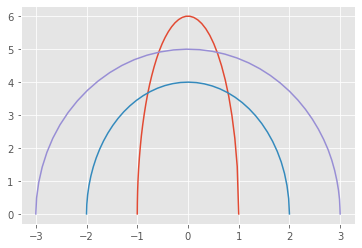

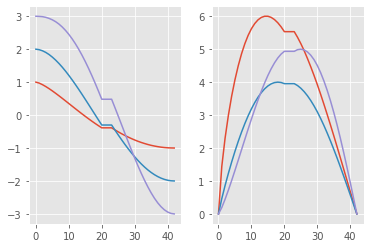

In [ ]:
# make new T and time array
T = len(xs[0])
t = np.linspace(0, 1, T)

# collect the curves into an array
beta = np.zeros((n, T, K))
for i in range(K):
    beta[0, :, i] = xs[i]
    beta[1, :, i] = ys[i]

# visualize the curves
plt.figure()
for i in [0, 1, 2]:
    plt.plot(beta[0, :, i], beta[1, :, i])

plt.figure()
plt.subplot(1, 2, 1)
for i in [0, 1, 2]:
    plt.plot(beta[0, :, i])

plt.subplot(1, 2, 2)
for i in [0, 1, 2]:
    plt.plot(beta[1, :, i])

In [ ]:
# create a curve registration object
curve = fdasrsf.curve_stats.fdacurve(beta, 'O')

ValueError: x must be strictly increasing

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ea7590-1f30-42ee-b9c1-c929b94e3f2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>